In [1]:
using Revise

In [2]:
using QuantumStates

[ Info: Precompiling QuantumStates [17f0441f-15e0-42ae-a101-302633ff8f0f]


In [59]:
H_operator = :(
    AX * Rotation_A +
    BX * Rotation_B + 
    CX * Rotation_C
);

In [60]:
parameters = @params begin
    AX = 9.693322e3
    BX = 0.142141e3
    CX = 0.139304e3
end;

In [61]:
QN_bounds = (S = 1/2, I = 1/2, N = 0:1)
basis = enumerate_states(AsymmetricTopMolecule, QN_bounds)
;

In [62]:
H.matrix[5,17]

0.0 + 0.0im

In [63]:
H.matrix[17,5]

0.0 + 0.0im

In [64]:
H = @time Hamiltonian(basis=basis, operator=H_operator, parameters=parameters)
@time evaluate!(H)
@time solve!(H)
;

  0.001175 seconds (141 allocations: 532.938 KiB)
  0.000010 seconds
  0.000058 seconds (207 allocations: 59.500 KiB)


In [65]:
using Plots

In [66]:
using LinearAlgebra

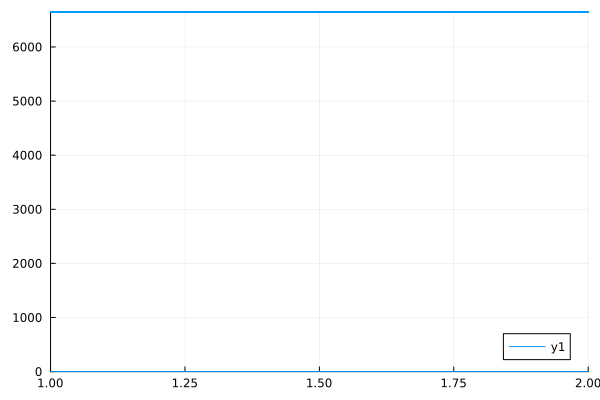

In [67]:
hline(energy.(H.states))

In [11]:
@time save_to_file(H, "CaSH_X", "")

  0.201235 seconds (462.90 k allocations: 30.771 MiB, 7.32% gc time, 97.65% compilation time)
